In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re
import matplotlib
%matplotlib inline
rcParams['figure.figsize'] = (10, 10)
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('C:/Users/Secretgarden/Downloads/DF/光伏电站/public.train.csv',engine= 'python')

### 对整体数据的描述

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 21 columns):
ID       9000 non-null int64
板温       9000 non-null float64
现场温度     9000 non-null float64
光照强度     9000 non-null int64
转换效率     9000 non-null float64
转化效率A    9000 non-null float64
转化效率B    9000 non-null float64
转化效率C    9000 non-null float64
电压A      9000 non-null int64
电压B      9000 non-null int64
电压C      9000 non-null int64
电流A      9000 non-null float64
电流B      9000 non-null float64
电流C      9000 non-null float64
功率A      9000 non-null float64
功率B      9000 non-null float64
功率C      9000 non-null float64
平均功率     9000 non-null float64
风速       9000 non-null float64
风向       9000 non-null int64
发电量      9000 non-null float64
dtypes: float64(15), int64(6)
memory usage: 1.4 MB
None


### 各变量的含义

![图片](colunms_info.png '各列变量的含义解释')

| 特征名 | 特征含义 |
| :------| ------: | 
| ID | 当前记录条数 |
| 板温 | 光伏电池板背测温度 |
| 现场温度 | 光伏电站现场温度 |
| 转换效率 | 计算得到的平均转换效率 |
| 转换效率A | 数据采集点A处的光伏板转换效率 |
| 转换效率B | 数据采集点B处的光伏板转换效率 |
| 转换效率C | 数据采集点C处的光伏板转换效率 |
| 转换效率D | 数据采集点D处的光伏板转换效率 |
|电压A|数据采集点A处汇流箱电压值|
|电压B|数据采集点B处汇流箱电压值|
|电压C|数据采集点C处汇流箱电压值|
|电压D|数据采集点D处汇流箱电压值|
|电流A|采集点A处汇流箱电流值|
|电流B|采集点B处汇流箱电流值|
|电流C|采集点C处汇流箱电流值|
|电流D|采集点D处汇流箱电流值|
|功率A|采集点A处的功率Pa，P=UI|
|功率B|采集点B处的功率Pa，P=UI|
|功率C|采集点C处的功率Pa，P=UI|
|功率D|采集点D处的功率Pa，P=UI|
|平均功率|为A、B、C三点功率的平均值：(Pa+Pb+Pc)/3|
|风速|为光伏电厂现场风速测量值|
|风向|为光伏电厂现场风的来向|

In [4]:
#经过查询资料  将无关变量ID，风向，风速剔除
del(df['ID'])
del(df['风向'])
del(df['风速'])

In [5]:
corrmat = df.corr()

In [37]:
#corrmat

### 原始数据的相关系数图

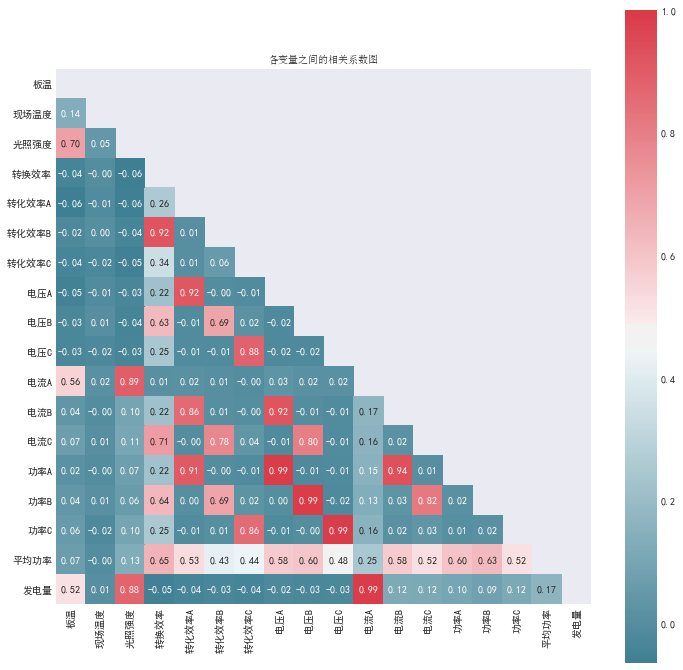

In [7]:
sns.set_style('dark')
plt.figure(figsize=(12,12))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
zhfont1 = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simsun.ttc')

mask = np.zeros_like(corrmat,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220,10,as_cmap=True)


#plt.xlabel('变量',fontproperties=zhfont1)
#plt.ylabel('变量',fontproperties=zhfont1)
plt.title('各变量之间的相关系数图',fontproperties=zhfont1)
sns.heatmap(corrmat , mask=mask , cmap = cmap ,square=True,annot= True,fmt='0.2f')

#### 根据四分位距定义异常值检验

In [8]:
#根据quantile定义的异常值检验
def outiler_testing_quantile(data):
    upper_testing_data =  data.quantile(0.75) + (data.quantile(0.75)-data.quantile(0.25))*1.5
    lower_testing_data =  data.quantile(0.25) - (data.quantile(0.75)-data.quantile(0.25))*1.5
    outiler_count = 0
    outiler_index = list()
    for index,i in enumerate(data):
        if i > upper_testing_data or i < lower_testing_data:
            outiler_count += 1
            outiler_index.append(index)
    if outiler_count > 0:
        print('There are %s outilers '%(outiler_count))
    else:
        print('Therr is no outiler')
    return(list(outiler_index))

In [9]:
print(df.columns)
outilers_quanlile = list()
for i in range(len(df.columns)):
    outilers_quanlile.append(outiler_testing_quantile(df[df.columns[i]]))

Index(['板温', '现场温度', '光照强度', '转换效率', '转化效率A', '转化效率B', '转化效率C', '电压A', '电压B',
       '电压C', '电流A', '电流B', '电流C', '功率A', '功率B', '功率C', '平均功率', '发电量'],
      dtype='object')
Therr is no outiler
There are 11 outilers 
Therr is no outiler
There are 531 outilers 
There are 550 outilers 
There are 531 outilers 
There are 549 outilers 
There are 121 outilers 
There are 105 outilers 
There are 112 outilers 
Therr is no outiler
There are 7 outilers 
There are 6 outilers 
There are 8 outilers 
There are 12 outilers 
There are 8 outilers 
There are 23 outilers 
Therr is no outiler


In [10]:
#把所有的异常值剔除
df_copy = df.copy()
for i in df_copy.columns: 
    upper_testing_data =  df_copy[i].quantile(0.75) + (df_copy[i].quantile(0.75)-df_copy[i].quantile(0.25))*1.5
    lower_testing_data =  df_copy[i].quantile(0.25) - (df_copy[i].quantile(0.75)-df_copy[i].quantile(0.25))*1.5
    df_copy[i][df_copy[i] > upper_testing_data] = None
    df_copy[i][df_copy[i] < lower_testing_data] = None

In [11]:
df_copy.tail(10)

,板温,现场温度,光照强度,转换效率,转化效率A,转化效率B,转化效率C,电压A,电压B,电压C,电流A,电流B,电流C,功率A,功率B,功率C,平均功率,发电量
8990,31.39,22.5,605,17.90,17.42,17.09,19.19,608.0,604.0,606.0,5.60,5.53,6.19,3404.80,3340.12,3751.14,3498.69,7.004241
8991,31.95,22.8,647,19.70,20.53,19.40,19.16,610.0,602.0,600.0,7.05,6.75,6.69,4300.50,4063.50,4014.00,4126.00,8.736486
8992,32.72,23.0,779,18.19,18.46,18.50,17.60,600.0,600.0,600.0,7.78,7.80,7.42,4668.00,4680.00,4452.00,4600.00,9.761747
8993,34.26,23.3,815,17.51,16.96,17.41,18.15,598.0,595.0,592.0,7.55,7.79,8.16,4514.90,4635.05,4830.72,4660.22,9.939029
8994,34.70,23.6,819,17.20,17.34,17.07,17.18,595.0,595.0,591.0,7.81,7.69,7.79,4646.95,4575.55,4603.89,4608.80,9.990341
8995,35.16,24.6,855,17.42,17.70,17.09,17.48,597.0,592.0,588.0,8.31,8.09,8.33,4961.07,4789.28,4898.04,4882.80,10.196422
8996,36.03,24.8,739,20.28,20.27,20.57,20.01,590.0,591.0,586.0,8.35,8.46,8.30,4926.50,4999.86,4863.80,4930.05,10.430261
8997,36.39,24.9,759,18.11,18.10,18.08,18.14,593.0,591.0,589.0,7.63,7.65,7.70,4524.59,4521.15,4535.30,4527.01,9.558046
8998,36.49,25.2,749,18.00,18.08,18.23,17.68,591.0,588.0,589.0,7.55,7.65,7.41,4462.05,4498.20,4364.49,4441.58,9.179218
8999,0.01,0.1,1,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.379993


### 剔除异常值后各变量间的相关系数图

<Figure size 864x864 with 0 Axes>

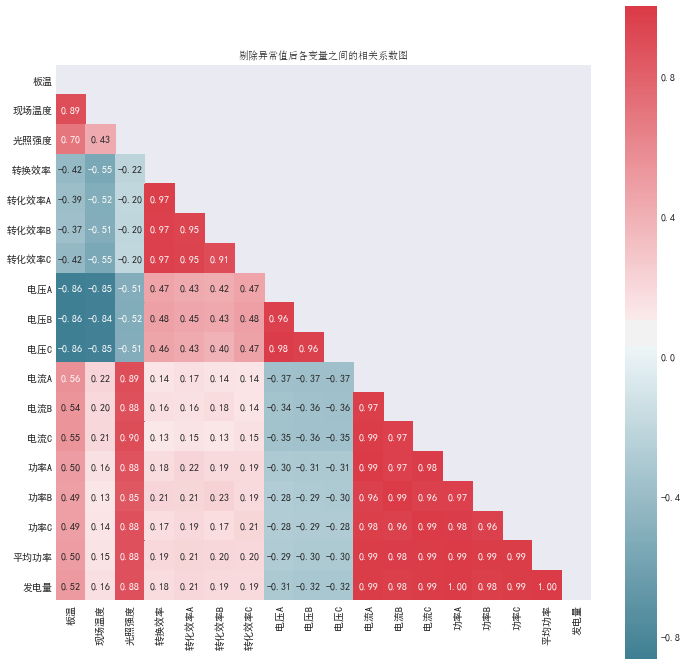

In [12]:
No_outiler_corrmat = df_copy.corr()
sns.set_style('dark')
plt.figure(figsize=(12,12))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
zhfont1 = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simsun.ttc')

mask2 = np.zeros_like(corrmat,dtype=np.bool)
mask2[np.triu_indices_from(mask2)] = True
cmap2 = sns.diverging_palette(220,10,as_cmap=True)

plt.figure(figsize=(12,12))
#plt.xlabel('变量',fontproperties=zhfont1)
#plt.ylabel('变量',fontproperties=zhfont1)
plt.title('剔除异常值后各变量之间的相关系数图',fontproperties=zhfont1)
sns.heatmap(No_outiler_corrmat , mask=mask2 , cmap = cmap2 ,square=True,annot= True,fmt='0.2f')

In [13]:
df = df[['板温','光照强度','电流A','发电量']]

In [14]:
print(df.shape)
print(type(df))
print(df.head())

(9000, 4)
<class 'pandas.core.frame.DataFrame'>
      板温  光照强度   电流A       发电量
0 -19.14    34  1.34  1.437752
1 -18.73    30  1.55  1.692575
2 -17.54    41  1.75  1.975787
3 -15.43    53  2.02  2.370656
4 -14.60    65  2.13  2.532091


In [36]:
'''
plt.figure(figsize=(12,10))
plt.subplot(1,3,1)
plt.scatter(df.板温,df.发电量,s =5 ,c='r',alpha=0.5)
plt.xlabel('板温',color = 'b')
plt.ylabel('发电量',color = 'b')
plt.title('板温与发电量之间的关系',color = 'm')
plt.subplot(1,3,2)
plt.scatter(df.光照强度,df.发电量,s =5 ,c='r',alpha=0.5)
plt.xlabel('光照强度',color = 'b')
plt.ylabel('发电量',color = 'b')
plt.title('光照强度与发电量之间的关系',color = 'm')
plt.subplot(1,3,3)
plt.scatter(df.电流A,df.发电量,s =5 ,c='r',alpha=0.5)
plt.xlabel('电流A',color = 'b')
plt.ylabel('发电量',color = 'b')
plt.title('电流A与发电量之间的关系',color = 'm')
'''

"plt.figure(figsize=(12,10))\nplt.subplot(1,3,1)\nplt.scatter(df.板温,df.发电量,s =5 ,c='r',alpha=0.5)\nplt.xlabel('板温',color = 'b')\nplt.ylabel('发电量',color = 'b')\nplt.title('板温与发电量之间的关系',color = 'm')\nplt.subplot(1,3,2)\nplt.scatter(df.光照强度,df.发电量,s =5 ,c='r',alpha=0.5)\nplt.xlabel('光照强度',color = 'b')\nplt.ylabel('发电量',color = 'b')\nplt.title('光照强度与发电量之间的关系',color = 'm')\nplt.subplot(1,3,3)\nplt.scatter(df.电流A,df.发电量,s =5 ,c='r',alpha=0.5)\nplt.xlabel('电流A',color = 'b')\nplt.ylabel('发电量',color = 'b')\nplt.title('电流A与发电量之间的关系',color = 'm')\n"

### 只选取一个特征电流A

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm_s1 = ols(formula='df.发电量 ~ df.电流A', data=df).fit()

lm_s1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 df.发电量   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 4.111e+05
Date:                Tue, 25 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:55:53   Log-Likelihood:                -6655.1
No. Observations:                9000   AIC:                         1.331e+04
Df Residuals:                    8998   BIC:                         1.333e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1977      0.010     19.573      0.000       0.178       0.218
df.电流A         1.3328      0.002    641.197      0.000       1.329       1.337
==============================================================================
Omnibus:                    12232.858   Durbin-Watson:                   1.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6542071.696
Skew:                          -7.492   Prob(JB):                         0.00
Kurtosis:                     134.229   Cond. No.                         9.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 画残差图

In [35]:
x = df[['板温','光照强度','电流A']]
y = df['发电量']
y_pred1 = lm_s1.predict(x)
error1 = y - y_pred1

def error_plot(error,*kwarg,**kwargs):
    fig = plt.figure(figsize=(15,25))
    colors = 'rgb'*3
    for i in range(1,10):
        plt.subplot(5,2,i)
        plt.plot( error , '.',color = colors[i-1],alpha = 0.5)
        plt.xlim((i-1)*1000,1000*(i))
        plt.xlabel('index',color = colors[i-1])
        plt.ylabel('残差值',color = colors[i-1])

error_plot(error1)

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm_s3 = ols(formula='df.发电量 ~ df.板温 + df.光照强度 +df.电流A', data=df).fit()

lm_s3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 df.发电量   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.480e+05
Date:                Tue, 25 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:55:55   Log-Likelihood:                -6314.7
No. Observations:                9000   AIC:                         1.264e+04
Df Residuals:                    8996   BIC:                         1.267e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1250      0.010     12.109      0.000       0.105       0.145
df.板温         -0.0161      0.001    -25.551      0.000      -0.017      -0.015
df.光照强度        0.0005   6.23e-05      7.863      0.000       0.000       0.001
df.电流A         1.3362      0.005    291.951      0.000       1.327       1.345
==============================================================================
Omnibus:                    13135.366   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9315575.965
Skew:                          -8.549   Prob(JB):                         0.00
Kurtosis:                     159.682   Cond. No.                         816.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
lm_s3.params

Intercept    0.124990
df.板温       -0.016114
df.光照强度      0.000490
df.电流A       1.336211
dtype: float64

### 画残差图

In [34]:
x = df[['板温','光照强度','电流A']]
y = df['发电量']
y_pred3 = lm_s3.predict(x)
error3 = y - y_pred3

error_plot(error3)

### 应变量是否为正态分布

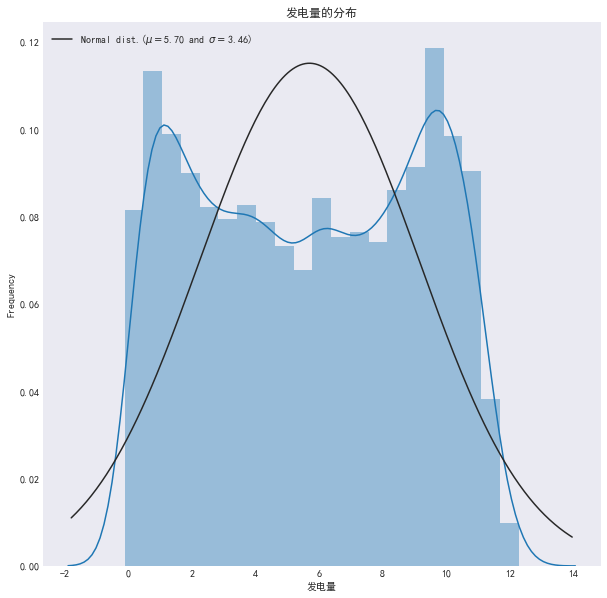

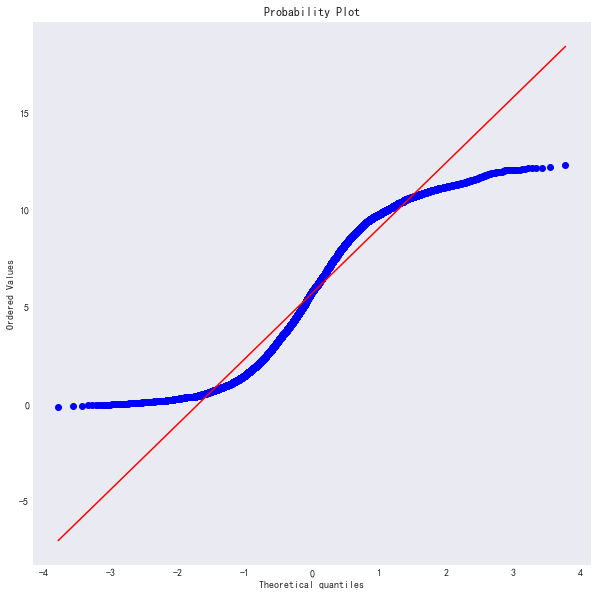

In [162]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew
sns.distplot(df.发电量,fit=norm)
(mu,sigma) = norm.fit(df.发电量)
plt.legend(['Normal dist.($\mu = ${:.2f} and $\sigma=${:.2f})'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('发电量的分布')
fig  =plt.figure()
res = stats.probplot(df.发电量,plot = plt)

### 应用随机森林和回归树来分析

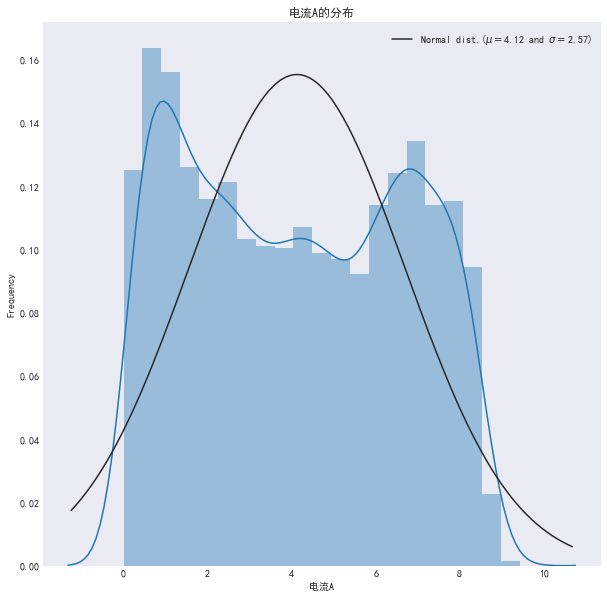

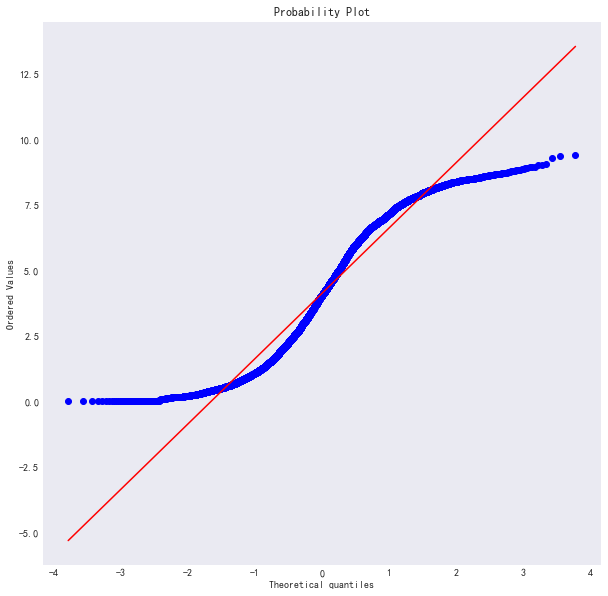

In [33]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew
sns.distplot(df.电流A,fit=norm)
(mu,sigma) = norm.fit(df.电流A)
plt.legend(['Normal dist.($\mu = ${:.2f} and $\sigma=${:.2f})'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('电流A的分布')
fig  =plt.figure()
res = stats.probplot(df.电流A,plot = plt)